# Lab Segmentation 1

In [10]:
from commonfunctions import *
import skimage.io as io
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


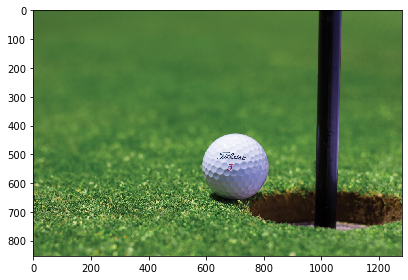

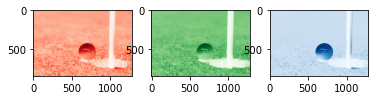

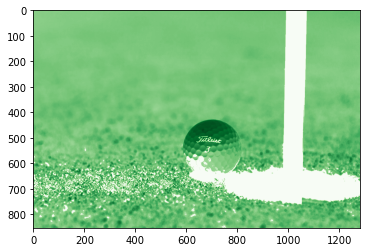

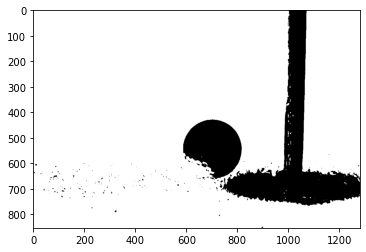

In [47]:
##### 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf

img=io.imread('imgs/exp1/golf.jpeg')
io.imshow(img)
io.show()
img=img.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
fig, ax = plt.subplots(ncols=3)
ax.ravel()
ax[0].imshow(red, cmap='Reds')
ax[1].imshow(green, cmap='Greens')
ax[2].imshow(blue, cmap='Blues')

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
green_copy=green.copy()
green_copy[green_copy<100]=0
fig, ax = plt.subplots(ncols=1)
ax.imshow(green_copy, cmap='Greens')

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 

# have larger values than the other channels with an appropriate threshold
msk=np.zeros([img.shape[0],img.shape[1]])
msk[ np.logical_and(green>red,green>blue)]=255
#msk[green>red]=255
#msk[green>blue]=255
# 6- display the binarized image
fig, ax = plt.subplots(ncols=1)
#ax.reval()
ax.imshow(msk,cmap="gray")





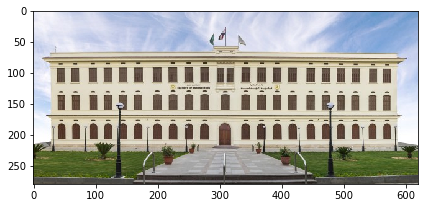

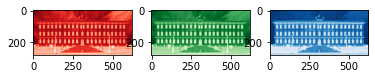

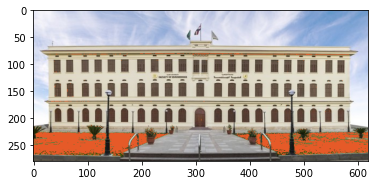

In [94]:
# 1- Get the required RGB color (Using a color picker)
r=71 
g=94
b=37

# 2- Read image
img2=io.imread('imgs/exp2/cufe.png')
io.imshow(img2)
io.show()
img2_c=img2.copy()
img2=img2.astype(float)
# 3- extract R, G and B channels (as float)

red2 = img2[:, :, 0]
green2 = img2[:, :, 1]
blue2 = img2[:, :, 2]
fig2, ax2 = plt.subplots(ncols=3)
ax2.ravel()
ax2[0].imshow(red2, cmap='Reds')
ax2[1].imshow(green2, cmap='Greens')
ax2[2].imshow(blue2, cmap='Blues')

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
rdiff=abs(red2-r)
gdiff=abs(green2-g)
bdiff=abs(blue2-b)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
overall=abs(rdiff)+abs(gdiff)+abs(bdiff)

# 6-  create a mask by thresholding the differences
img2_c[np.logical_and(bdiff<20,gdiff<20,rdiff<20)]=[(230,90,40)]

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it
fig, ax = plt.subplots(ncols=1)
#ax.reval()
ax.imshow(img2_c)
